In [26]:
'''
Importing necessary libraries
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
'''Storing dataset values in X and y'''

data = pd.read_csv('linear_svm_data.csv')
X = np.array(data[['x1', 'x2']].values)
y = np.array(data['label'].values)


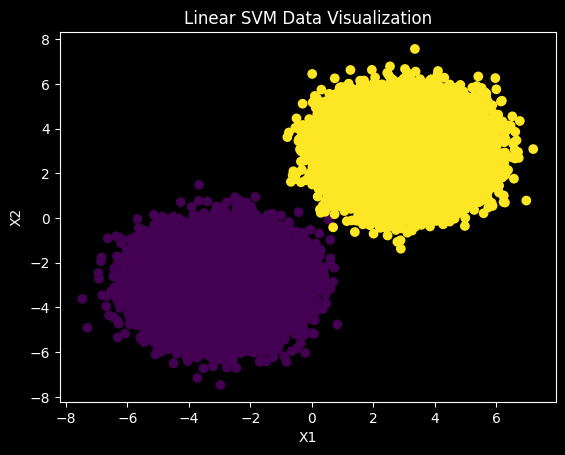

In [28]:
'''
Visualizing the dataset
'''
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear SVM Data Visualization')
plt.show()

In [29]:
'''
For Linearly Separable Data, we need a Optimal Margin Classifier
'''
def normal_vector(w):
    return w / np.linalg.norm(w)
def HardMarginClassifier(X, y,w,b):
    for i in range(len(y)):
        if y[i] * (np.dot(w, X[i]) + b) < 1:
            return False
    return True

In [54]:
'''
We need to train the model on the dataset to find optimal w and b
'''
def BatchGradientDescent(X,y,epochs,learning_rate):
    m = len(data)
    b = 0
    w = np.zeros(X.shape[1])
    
    for i in range(epochs):
        x_i = X[i]
        y_i = y[i]
        if y_i * (np.dot(w, x_i) + b) >= 1:
            w -= learning_rate * (2 * 1/m * w)
        else:
            w -= learning_rate * (2 * 1/m * w - np.dot(x_i, y_i))
            b += learning_rate * y_i
    return w, b

In [55]:
# Convert labels if needed
y_svm = np.where(y == 0, -1, 1)

w, b = BatchGradientDescent(X, y_svm, epochs=10000,learning_rate=0.0001)

print("w:", w)
print("b:", b)


w: [0.26971147 0.2707653 ]
b: -0.11820000000000236


C:\Users\karti\AppData\Local\Temp\ipykernel_7912\3094267818.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_vals, y_margin1, 'k--',c = 'skyblue')
C:\Users\karti\AppData\Local\Temp\ipykernel_7912\3094267818.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_vals, y_margin2, 'k--',c='white')


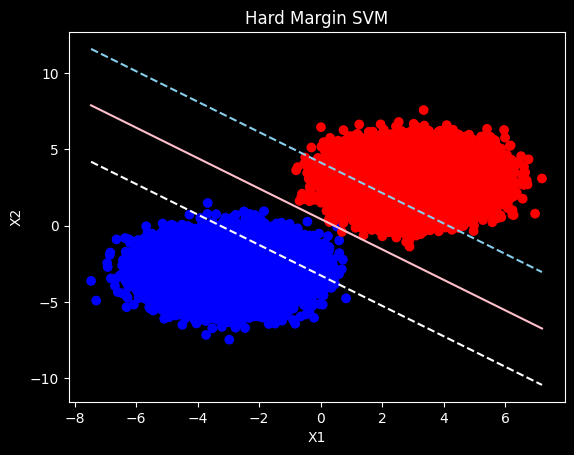

In [56]:
'''Plotting the graph of data and that of our hypothesis gives us a picture of the accuracy of algorithm with respect to our data'''
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 200)
y_vals = -(w[0] * x_vals + b) / w[1]
y_margin1 = -(w[0] * x_vals + b - 1) / w[1]
y_margin2 = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, y_vals, c='pink')
plt.plot(x_vals, y_margin1, 'k--',c = 'skyblue')
plt.plot(x_vals, y_margin2, 'k--',c='white')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Hard Margin SVM")
plt.show()


In [57]:
def predict_svm(X, w, b):
    return np.sign(X @ w + b)
y_pred = predict_svm(X, w, b)
accuracy = np.mean(y_pred == y_svm)
print("Training Accuracy:", accuracy*100, "%")

Training Accuracy: 99.998 %
